## Rationale: Compare deconvoluted single cell datasets generated with different references (Kanemaru et al. vs Linscheid et al.)

To demonstrate whether deconvoluting the human Sinus Node (SN) with Bulk2Space is a robust approach, we compared the single cell deconvoluted results obtained using the original reference dataset (Linscheid et al.) with those obtained using a different reference dataset (Kanemaru et al.).

## Load modules

In [3]:
import pandas as pd
import numpy as np
import scanpy
import matplotlib.pyplot as plt
import scipy.stats as pearsonr
import bulk2space
from tqdm import tqdm

## Load the input files

Loading the SN single cell data generated using Linscheid et al. (original dataset) and Kanemaru et al (different dataset).
The following files will be loaded:
- SN sc data generated from Linscheid et al.
- SN sc meta generated from Linscheid et al.
- SN sc data generated from Kanemaru et al.
- SN sc meta generated from Kanemaru et al.

In [4]:
# Sinus Node data generated from Linscheid et al (ORIGINAL)
sn_ms_data = bulk2space.utils.load_data(
    input_bulk_path="C:/Users/chelu/OneDrive - The University of Manchester/PhD OneDrive/Coding/Python Material/Bulk2space/Datasets/Halina Dobrzynski/Sinus Node/SN_human_bulk_cleaned.csv",
    input_sc_data_path="C:/Users/chelu/OneDrive - The University of Manchester/PhD OneDrive/Coding/Python Material/Bulk2space/Datasets/Halina Dobrzynski/Sinus Node/output/SN_human_from_mouse_sc_data.csv",
    input_sc_meta_path="C:/Users/chelu/OneDrive - The University of Manchester/PhD OneDrive/Coding/Python Material/Bulk2space/Datasets/Halina Dobrzynski/Sinus Node/output/SN_human_from_mouse_sc_celltype.csv",
    input_st_data_path="C:/Users/chelu/OneDrive - The University of Manchester/PhD OneDrive/Coding/Python Material/Bulk2space/Datasets/Halina Dobrzynski/Sinus Node/st_data.csv",
    input_st_meta_path="C:/Users/chelu/OneDrive - The University of Manchester/PhD OneDrive/Coding/Python Material/Bulk2space/Datasets/Halina Dobrzynski/Sinus Node/st_meta.csv",
)

loading data......
load data done!


In [5]:
display(sn_ms_data['input_sc_meta'])

# Create a scanpy object for later use
sc = scanpy.AnnData(sn_ms_data["input_sc_data"].T)
sc.obs = sn_ms_data["input_sc_meta"][["Cell_type"]]

,Cell,Cell_type
0,C_1,Adipocytes III
1,C_2,Sinus node myocytes
2,C_3,Macrophages
3,C_4,Adipocytes III
4,C_5,Sinus node myocytes
...,...,...
5352,C_5353,Macrophages
5353,C_5354,Macrophages
5354,C_5355,Macrophages
5355,C_5356,Macrophages


In [8]:
# Sinus Node data generated from Kanemaru et al.
sn_kane_data = pd.read_csv("Central + peripheral SAN/output_SAN_complete/SAN_complete_sc_data.csv")
sn_kane_meta = pd.read_csv("Central + peripheral SAN/output_SAN_complete/SAN_complete_sc_celltype.csv")

sn_kane_meta.head()

,Unnamed: 0,Cell,Cell_type
0,0,C_1,FB4_activated
1,1,C_2,FB4_activated
2,2,C_3,FB4_activated
3,3,C_4,PC3_str
4,4,C_5,FB4_activated


## Correlation matrix

Calculate 200 marker genes of SN cells generate using Linscheid et al,

In [9]:
sc = scanpy.AnnData(sn_ms_data["input_sc_data"].T)
sc.obs = sn_ms_data["input_sc_meta"][["Cell_type"]]
scanpy.tl.rank_genes_groups(sc, "Cell_type", method="wilcoxon")
marker_df = pd.DataFrame(sc.uns["rank_genes_groups"]["names"]).head(200)
marker = list(np.unique(np.ravel(np.array(marker_df))))

# the mean expression of 200 marker genes of input sc data
sc_marker = sn_ms_data["input_sc_data"].loc[marker, :].T
new_index = sn_ms_data['input_sc_meta']['Cell'].to_list()
sn_ms_data['input_sc_meta'] = sn_ms_data['input_sc_meta'].set_index('Cell') 
sc_marker["Cell_type"] = sn_ms_data["input_sc_meta"]["Cell_type"]
sc_marker_mean = sc_marker.groupby("Cell_type")[marker].mean()



In [10]:
display(sc_marker_mean)

,A4GALT,AACS,ABCA1,ABCA6,ABCA8,ABCA9,ABHD15,ABI1,ABLIM2,ABLIM3,...,ZEB2,ZFHX3,ZFHX4,ZFPM2,ZNF185,ZNF385B,ZNF423,ZNF462,ZNF804B,ZSWIM6
Cell_type,,,,,,,,,,,,,,,,,,,,,
Adipocytes III,0.254569,0.969846,1.278523,0.169589,0.212056,0.264903,0.385168,1.740469,0.111793,0.325266,...,1.988630,1.511998,0.766161,1.923833,0.111058,0.066902,1.088450,0.652292,0.254955,1.126906
Fibroblasts II,0.571111,0.179639,0.887027,0.489026,0.605920,0.599685,0.074060,1.908632,0.099027,0.321999,...,2.147140,1.329200,0.587171,2.532043,0.066158,0.141318,0.889078,0.896516,0.296138,1.420086
Macrophages,0.208898,0.128620,0.938952,0.192719,0.125040,0.900125,0.068199,1.785459,0.095809,0.178641,...,2.716170,1.474500,0.305612,1.927865,0.059565,0.086084,0.499218,0.485112,0.193720,2.065986
Neurons,0.231531,0.178607,0.746882,0.246140,0.290833,0.305251,0.042553,2.471123,0.109850,1.044463,...,1.327541,1.153753,0.931531,2.679212,0.339381,0.123671,0.456086,1.277222,2.162625,0.993463
Sinus node myocytes,0.238069,0.367246,0.554757,0.155429,0.214873,0.206228,0.149913,1.514831,0.745457,0.343763,...,1.660301,0.899912,0.382194,2.299245,0.039805,0.845756,0.551702,0.729570,0.241310,0.952740


Calculate 200 marker genes of SN cells generate using Kanemaru et al.

In [11]:
sn_kane_meta.index = list(sn_kane_meta["Cell"])
sn_kane_data_new = sn_kane_data.T
new_header = sn_kane_data_new.iloc[0]
sn_kane_data_new = sn_kane_data_new[1:]
sn_kane_data_new.columns = new_header
# ---------------------------------------------------------
# Added this line to fix code breaking at groupby
sn_kane_data_new = sn_kane_data_new.astype(float)
# ---------------------------------------------------------

# Extract mutual marker genes
common_markers = list(set(sn_kane_data_new.columns).intersection(set(marker)))
sn_kane_data_new = sn_kane_data_new[common_markers]

sn_kane_data_new["Cell_type"] = sn_kane_meta["Cell_type"]
sn_kane_marker_mean = sn_kane_data_new.groupby(["Cell_type"])[common_markers].mean()

sc_marker_mean = sc_marker_mean[common_markers]

In [12]:
display(sn_kane_marker_mean)

Unnamed: 0,LTBP1,MT-CO1,PLCL2,CASK,NDUFA4,KIF6,C11orf54,COL8A1,ERBB4,SYNPO2,...,CSGALNACT1,ARHGAP28,CLIP2,SHANK2,WNK2,MT-CO3,DPP4,TMEM119,COLGALT2,TMEM120B
Cell_type,,,,,,,,,,,,,,,,,,,,,
FB4_activated,2.037936,2.709564,0.248940,0.503479,0.355535,0.0,0.141967,1.899161,0.151794,1.174601,...,0.549244,0.048431,0.074076,0.000000,0.013711,2.367966,0.0,0.024933,0.824811,0.111443
NC2_glial_NGF+,1.143074,2.894083,0.375144,0.597483,0.609486,0.0,0.251340,0.993193,0.427494,1.101191,...,0.899348,0.139076,0.243870,0.000049,0.081866,2.903011,0.0,0.008132,0.347321,0.117665
PC1_vent,0.045083,0.711945,0.000387,0.371978,0.014992,0.0,0.000000,0.000000,0.567979,0.837601,...,0.000000,0.000000,0.000000,0.237568,0.000000,1.193325,0.0,0.000000,0.000000,0.000000
PC3_str,0.173226,2.860225,0.125174,0.176727,0.327876,0.0,0.090975,0.018398,0.029199,0.863903,...,0.001627,0.020410,0.124171,0.000039,0.000000,3.029623,0.0,0.000000,0.018241,0.047312
SAN_P_cell,1.838200,2.013733,1.605384,0.283153,0.738591,0.0,0.334224,0.152026,2.155888,1.258881,...,0.856240,0.145996,0.004135,0.011501,1.143246,1.880239,0.0,0.000000,0.100706,0.172029


Transpose both datasets prior to correlation calculation

In [13]:
sc_marker_mean = sc_marker_mean.T
sn_kane_marker_mean = sn_kane_marker_mean.T

Plot the correlation matrix between SN single cells generated from different references

100%|██████████| 5/5 [00:00<00:00, 1665.46it/s]


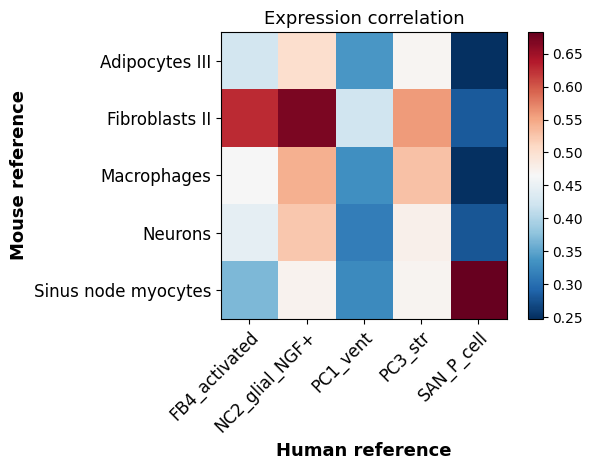

In [14]:
coeffmat = np.zeros(
    (sc_marker_mean.shape[1], sn_kane_marker_mean.shape[1]))
for i in tqdm(range(sc_marker_mean.shape[1])):
    for j in range(sn_kane_marker_mean.shape[1]):

        corrtest = pearsonr.pearsonr(
            sc_marker_mean[sc_marker_mean.columns[i]],
            sn_kane_marker_mean[sn_kane_marker_mean.columns[j]],
        )
        coeffmat[i, j] = corrtest[0]

tm_ct = list(sc_marker_mean.columns)
ts_ct = list(sn_kane_marker_mean.columns)

# plot
fig, ax = plt.subplots()
im = ax.imshow(coeffmat, cmap="RdBu_r")
ax.set_xticks(np.arange(len(ts_ct)))
ax.set_xticklabels(ts_ct, fontsize = 12)
ax.set_yticks(np.arange(len(tm_ct)))
ax.set_yticklabels(tm_ct, fontsize = 12)
plt.xlabel("Human reference", fontweight = 'bold', fontsize = 13)
plt.ylabel("Mouse reference", fontweight = 'bold', fontsize = 13)
plt.setp(ax.get_xticklabels(), rotation = 45,  ha="right", rotation_mode="anchor")
plt.colorbar(im)
ax.set_title("Expression correlation", fontsize = 13)
fig.tight_layout()

In [15]:
fig.savefig('Complete comparison.png', dpi =600)

### Polishing the figure

Keep mutual cells across datasets for an appropriate comparison.

In [16]:
# Cells from Kanemaru et al.
reordered_cells = ['FB4_activated', 
                   'NC2_glial_NGF+',
                   'SAN_P_cell']
sn_kane_marker_mean = sn_kane_marker_mean[reordered_cells]

In [17]:
# Cells from Linscheid et al.
formatted_names = ['Fibroblasts II', 
                   'Neurons',
                   'Sinus node myocytes']

sc_marker_mean = sc_marker_mean[formatted_names]

Run again the correlation matrix and plot the results

100%|██████████| 3/3 [00:00<00:00, 2998.07it/s]


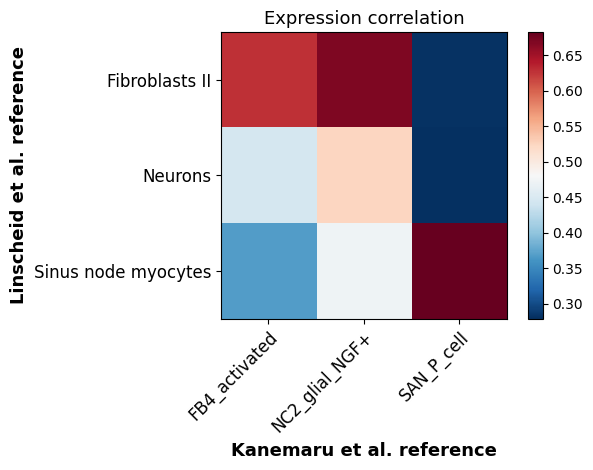

In [18]:
coeffmat = np.zeros(
    (sc_marker_mean.shape[1], sn_kane_marker_mean.shape[1]))
for i in tqdm(range(sc_marker_mean.shape[1])):
    for j in range(sn_kane_marker_mean.shape[1]):

        corrtest = pearsonr.pearsonr(
            sc_marker_mean[sc_marker_mean.columns[i]],
            sn_kane_marker_mean[sn_kane_marker_mean.columns[j]],
        )
        coeffmat[i, j] = corrtest[0]

tm_ct = list(sc_marker_mean.columns)
ts_ct = list(sn_kane_marker_mean.columns)

#plot again
fig, ax = plt.subplots()
im = ax.imshow(coeffmat, cmap="RdBu_r")
ax.set_xticks(np.arange(len(ts_ct)))
ax.set_xticklabels(ts_ct, fontsize = 12)
ax.set_yticks(np.arange(len(tm_ct)))
ax.set_yticklabels(tm_ct, fontsize = 12)
plt.xlabel("Kanemaru et al. reference", fontweight = 'bold', fontsize = 13)
plt.ylabel("Linscheid et al. reference", fontweight = 'bold', fontsize = 13)
plt.setp(ax.get_xticklabels(), rotation = 45,  ha="right", rotation_mode="anchor")
plt.colorbar(im)
ax.set_title("Expression correlation", fontsize = 13)
fig.tight_layout()

# Save the final figure
plt.savefig('Linscheid vs Kanemaru.png', dpi=600)  # Save the figure as PNG with 600 dpi